In [ ]:
# Raw Data Load

In [1]:
import pandas as pd

df_traffic_data = pd.read_csv('./data/Metro_Interstate_Traffic_Volume.csv',  parse_dates=['date_time'])

In [2]:
df_traffic_data.shape

(48204, 9)

In [3]:
df_traffic_data.date_time.min(), df_traffic_data.date_time.max()

(Timestamp('2012-10-02 09:00:00'), Timestamp('2018-09-30 23:00:00'))

In [ ]:
# Raw Data Analysis

In [14]:
df_traffic_data.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767


In [4]:
df_traffic_data.tail(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [15]:
df_traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              61 non-null     object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [16]:
df_traffic_data.describe()

,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,2016-01-05 10:46:16.773711616,3259.818355
min,0.000000,0.000000,0.000000,0.000000,2012-10-02 09:00:00,0.000000
25%,272.160000,0.000000,0.000000,1.000000,2014-02-06 11:45:00,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,2016-06-11 03:30:00,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,2017-08-11 06:00:00,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,2018-09-30 23:00:00,7280.000000
std,13.338232,44.789133,0.008168,39.015750,NaN,1986.860670


In [17]:
df_traffic_data.describe(include='object')

,holiday,weather_main,weather_description
count,61,48204,48204
unique,11,11,38
top,Labor Day,Clouds,sky is clear
freq,7,15164,11665


In [18]:
print(f'max date:{df_traffic_data.date_time.max()}, min date:{df_traffic_data.date_time.min()}')

max date:2018-09-30 23:00:00, min date:2012-10-02 09:00:00


In [ ]:
# Univariate Analysis

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

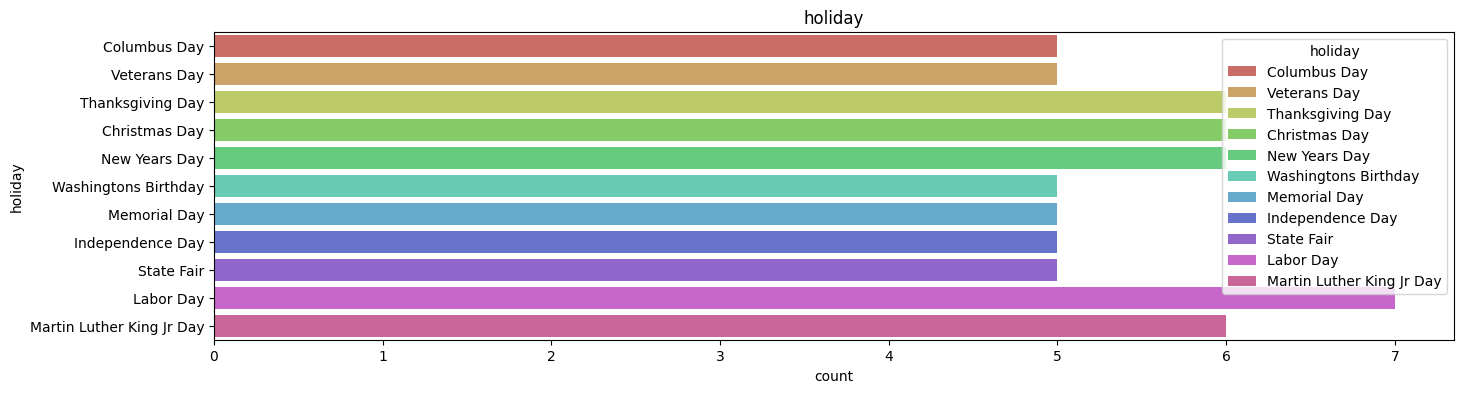

In [120]:
# holiday Categorical US National holidays plus regional holiday, Minnesota State Fair

y_size = df_traffic_data['holiday'].dropna().unique().size
fig = plt.figure(figsize=(16,4))
axs = fig.subplot_mosaic([['holiday']])
axs['holiday'].set_title('holiday')
sns.countplot(y='holiday', data=df_traffic_data, hue='holiday',  ax=axs['holiday'],  palette=sns.color_palette('hls', y_size))
plt.show()

°C max: 36.920, min:-273.150


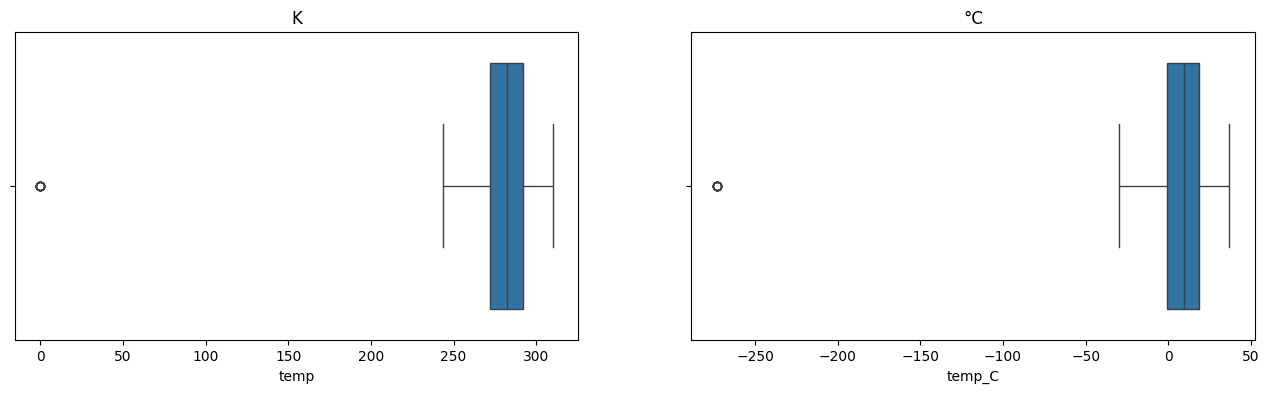

In [75]:
# temp Numeric Average temp in kelvin
#  0°C = 273.15K   열역학 제3법칙에 의해 0K 을 구현하는 것은 불가능.

df_traffic_data['temp_C'] = (df_traffic_data['temp']-273.15)
print(f'°C max:{df_traffic_data.temp_C.max():7.3f}, min:{df_traffic_data.temp_C.min():7.3f}')

fig = plt.figure(figsize=(16,4))
axs = fig.subplot_mosaic([['K', '°C']])

axs['K'].set_title('K')
axs['°C'].set_title('°C')

sns.boxplot(ax=axs['K'], x='temp', data = df_traffic_data)
sns.boxplot(ax=axs['°C'], x='temp_C', data = df_traffic_data)

plt.show()

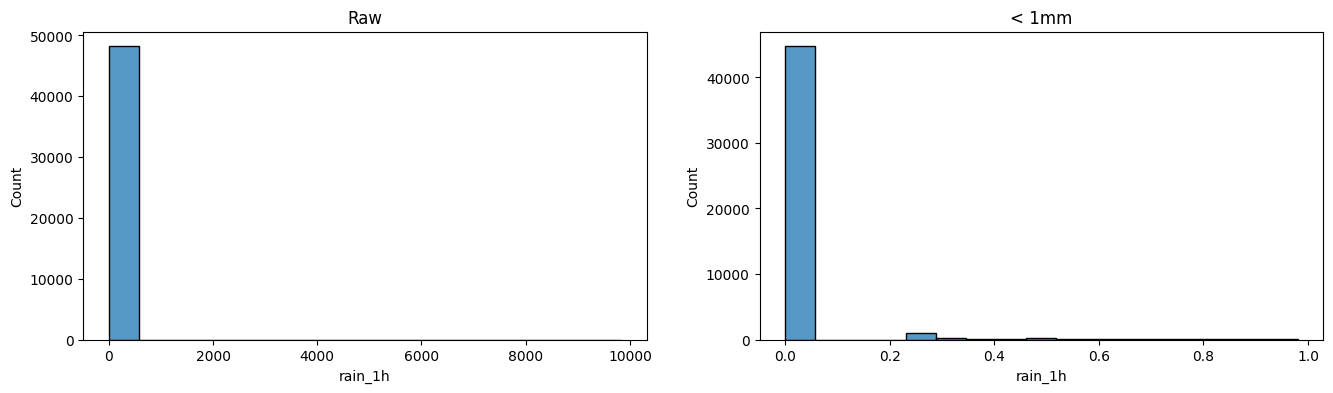

In [94]:
# rain_1h Numeric Amount in mm of rain that occurred in the hour

fig = plt.figure(figsize=(16,4))

axs = fig.subplot_mosaic([['Raw', '1mm']])

axs['Raw'].set_title('Raw')
axs['1mm'].set_title('< 1mm')

sns.histplot( df_traffic_data.rain_1h, ax=axs['Raw'])
sns.histplot( df_traffic_data.rain_1h.loc[df_traffic_data.rain_1h<1], ax=axs['1mm'])

plt.show()

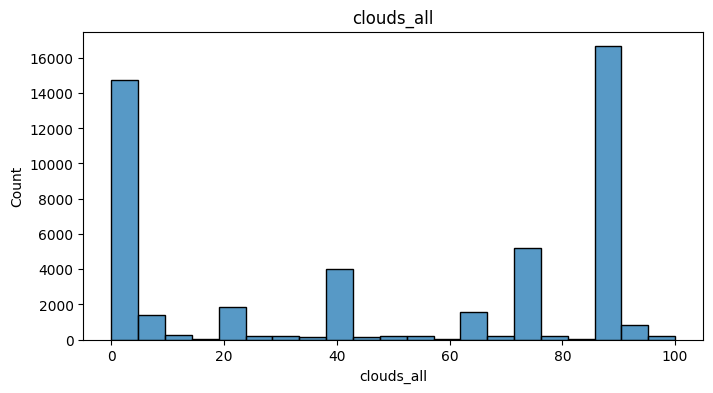

In [101]:
fig = plt.figure(figsize=(8,4))
axs = fig.subplot_mosaic([['clouds_all']])
axs['clouds_all'].set_title('clouds_all')

sns.histplot(df_traffic_data.clouds_all, ax=axs['clouds_all'])
plt.show()

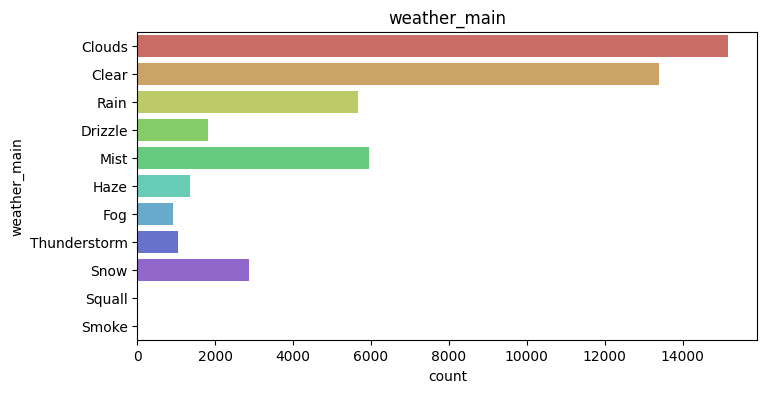

In [112]:
y_size = df_traffic_data['weather_main'].dropna().unique().size
fig = plt.figure(figsize=(8,4))
axs = fig.subplot_mosaic([['weather_main']])
axs['weather_main'].set_title('weather_main')
sns.countplot(y='weather_main', data=df_traffic_data, hue='weather_main',  ax=axs['weather_main'],  palette=sns.color_palette('hls', y_size))
plt.show()

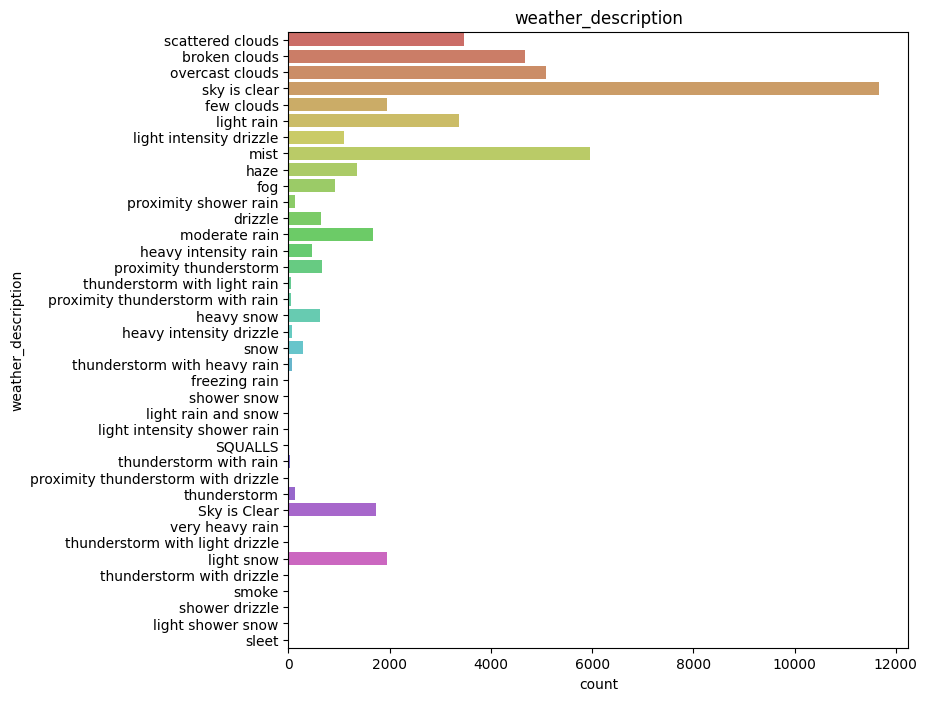

In [117]:
y_size = df_traffic_data['weather_description'].dropna().unique().size
fig = plt.figure(figsize=(8,8))
axs = fig.subplot_mosaic([['weather_description']])
axs['weather_description'].set_title('weather_description')
sns.countplot(y='weather_description', data=df_traffic_data, hue='weather_description',  ax=axs['weather_description'],  palette=sns.color_palette('hls', y_size))
plt.show()

In [118]:
#Bivariate Analysis

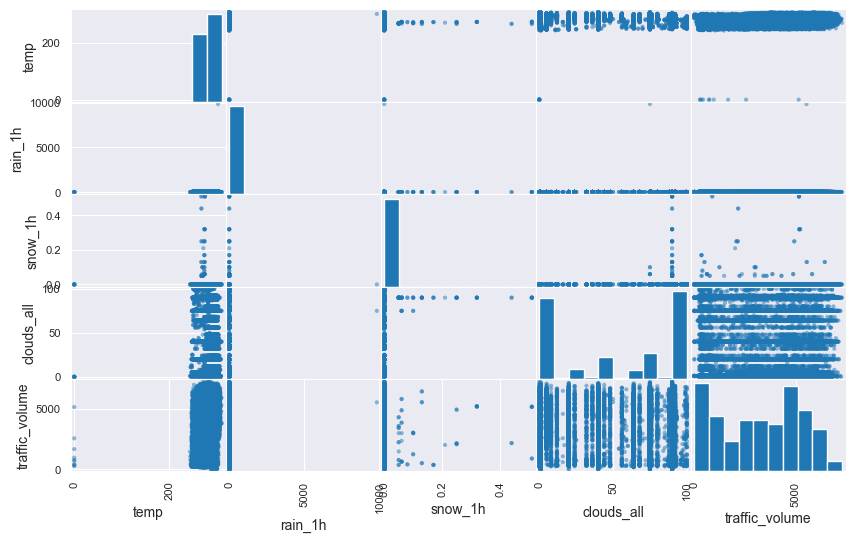

In [200]:
from pandas.plotting import scatter_matrix

num_vars = ['temp','rain_1h','snow_1h','clouds_all','traffic_volume']
scatter_matrix(df_traffic_data[num_vars],figsize=(10,6))
plt.show()

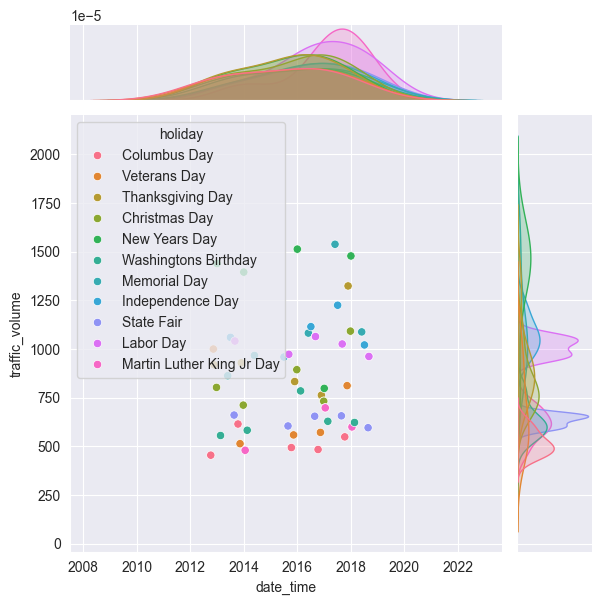

In [199]:
sns.jointplot(x='date_time', y='traffic_volume', hue='holiday', data = df_traffic_data,  kind='scatter', height=6)
plt.show()

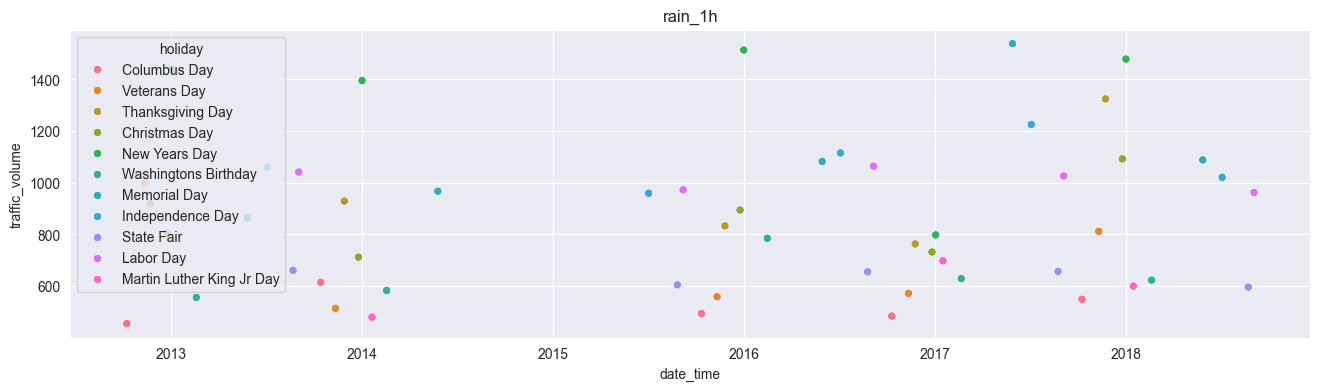

In [187]:
fig = plt.figure(figsize=(16,4))
axs = fig.subplot_mosaic([['rain_1h']])
axs['rain_1h'].set_title('rain_1h')
sns.scatterplot(x='date_time', y='traffic_volume', data=df_traffic_data, hue='holiday',  ax=axs['rain_1h'])
plt.show()

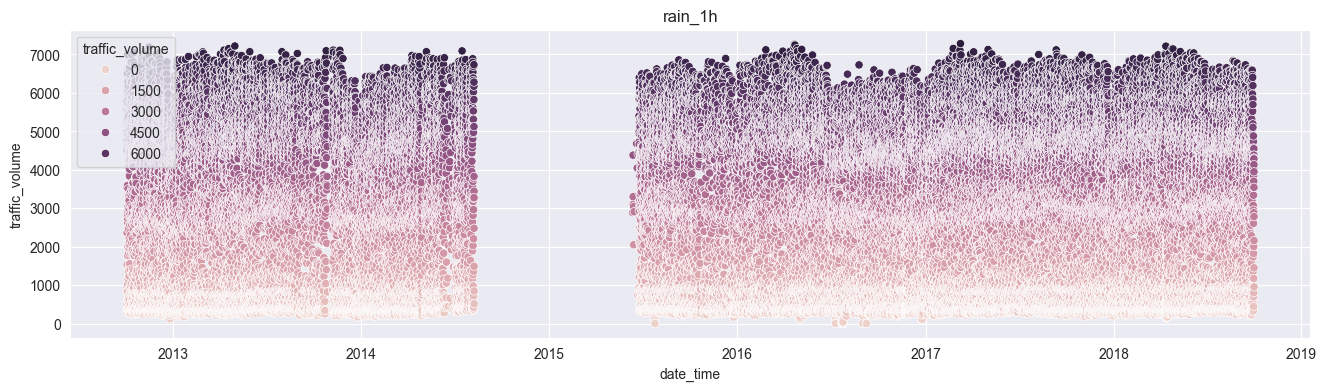

In [226]:
fig = plt.figure(figsize=(16,4))
axs = fig.subplot_mosaic([['traffic_volume']])
axs['traffic_volume'].set_title('traffic_volume')
sns.scatterplot(x='date_time', y='traffic_volume', data=df_traffic_data, hue='traffic_volume',  ax=axs['traffic_volume'])
plt.show()

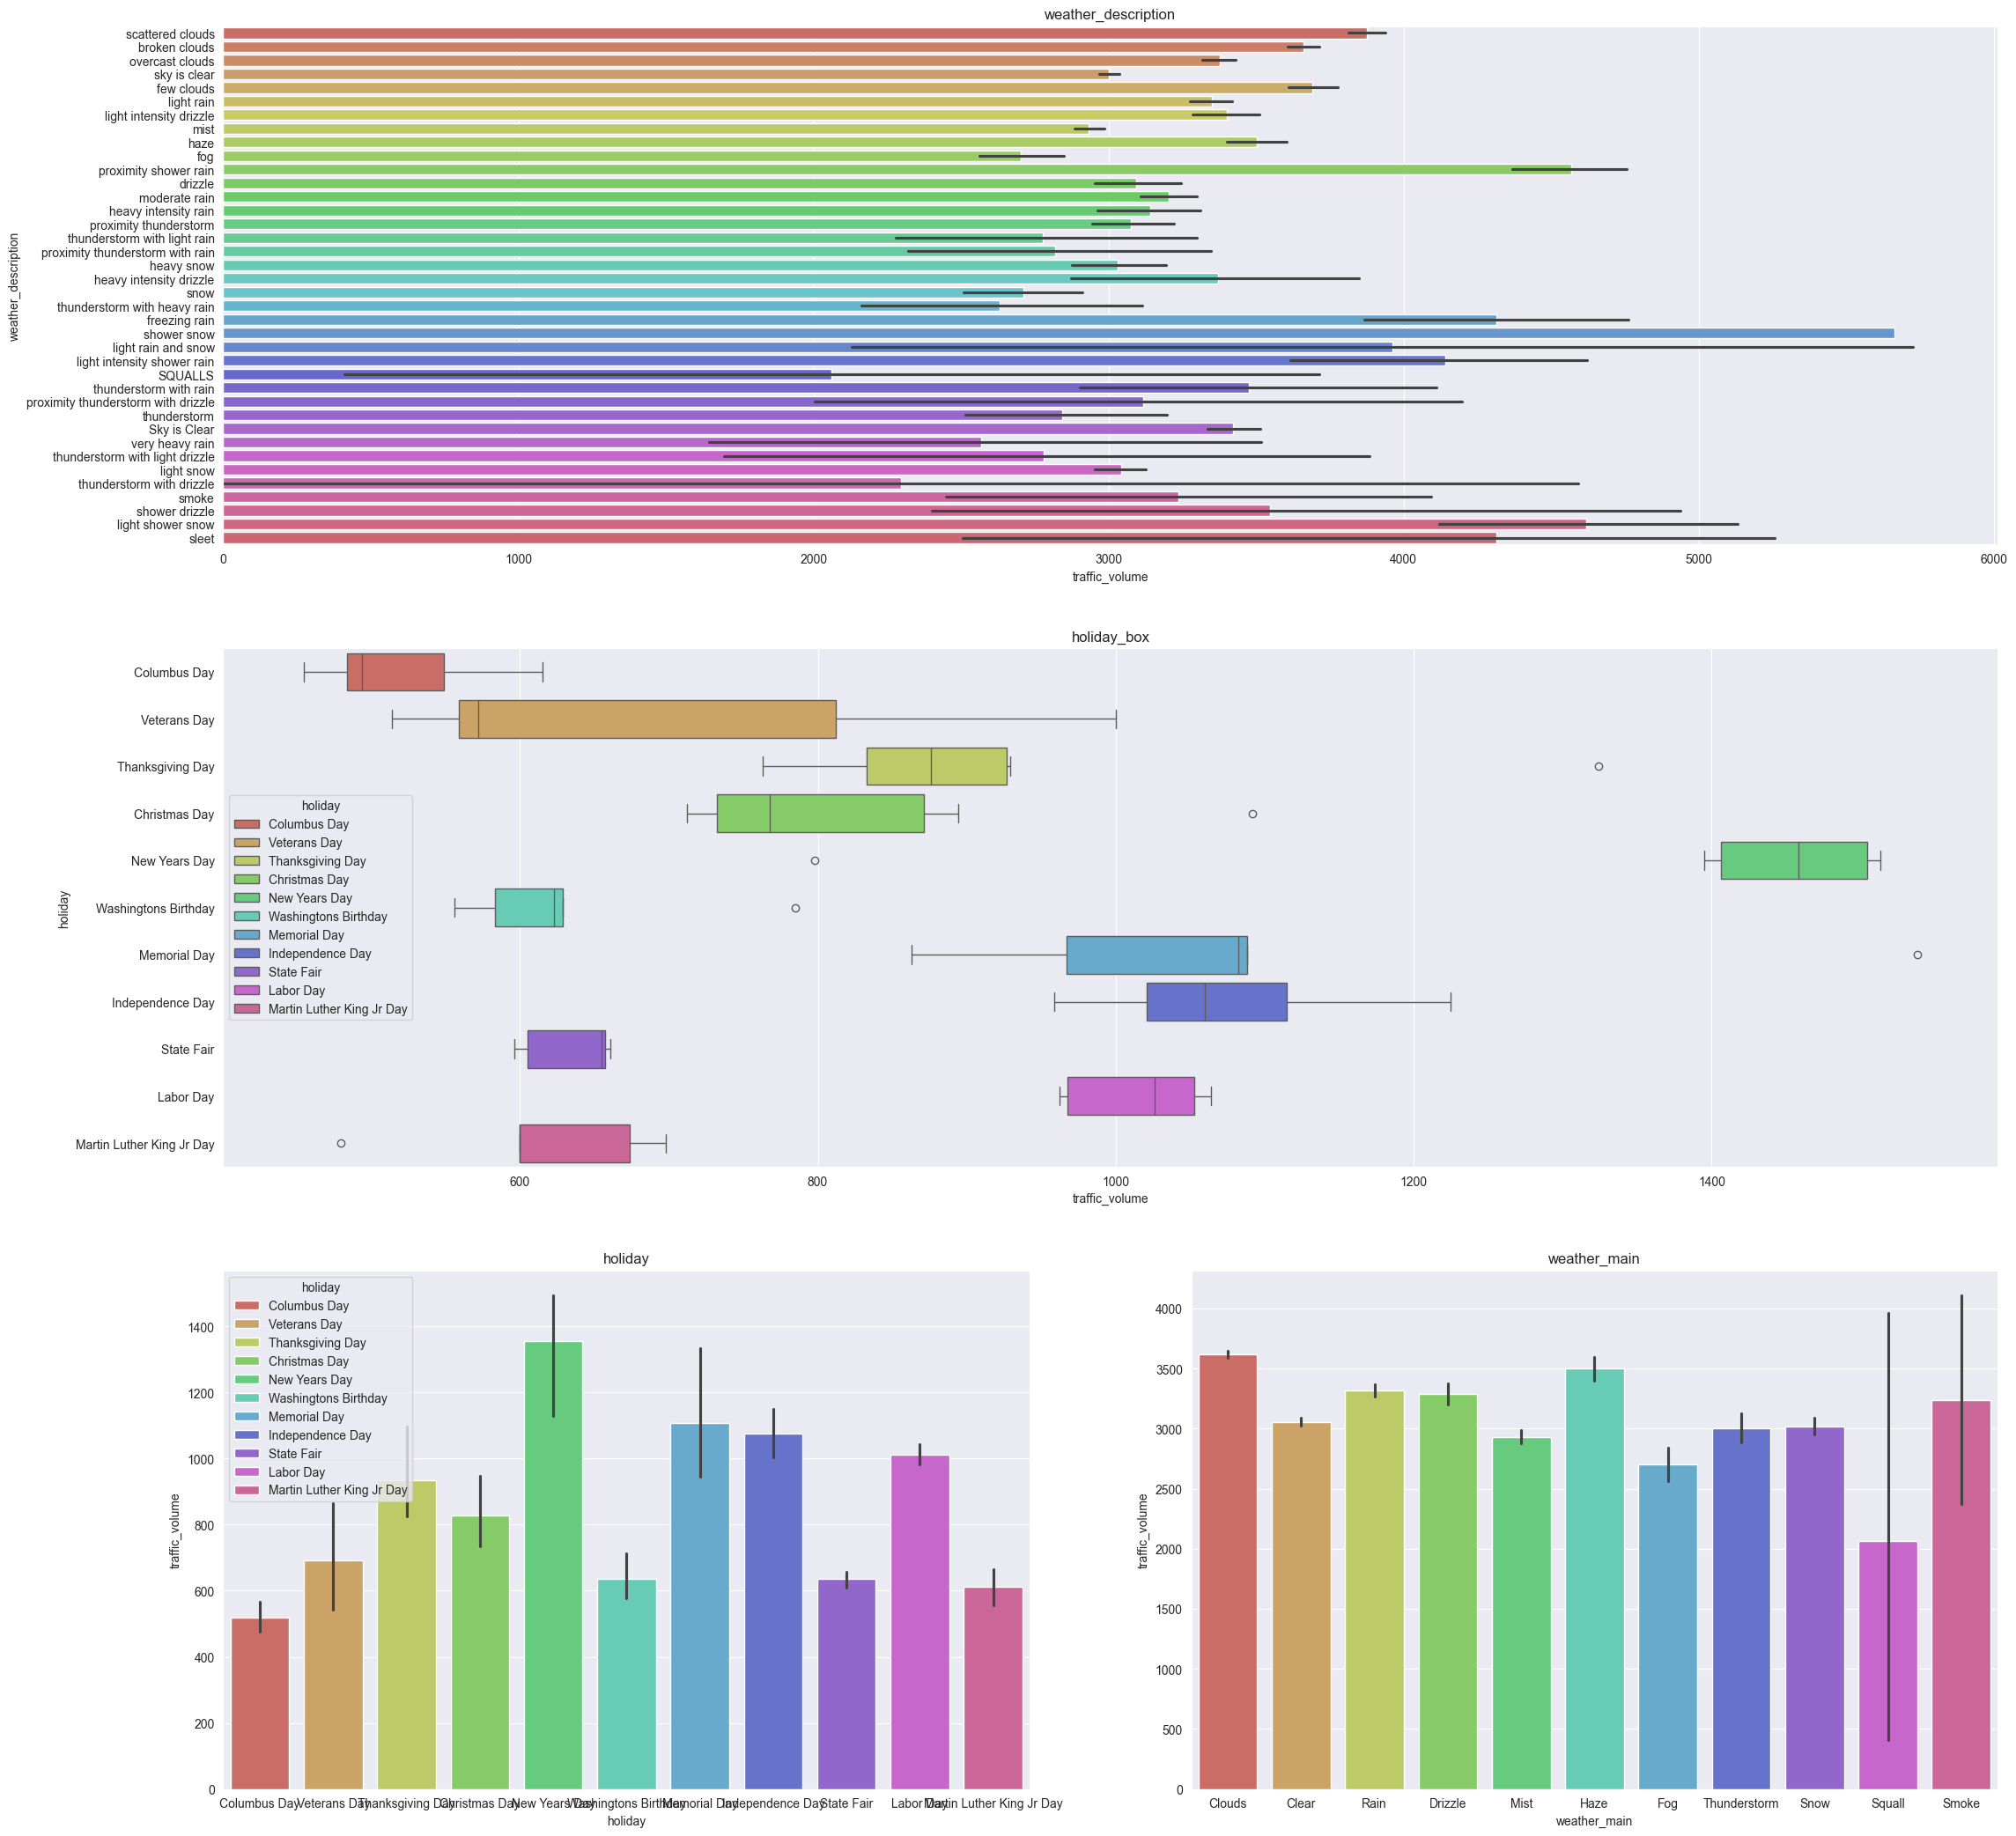

In [223]:
holiday_size = df_traffic_data['holiday'].dropna().unique().size
weather_main_size = df_traffic_data['weather_main'].dropna().unique().size
weather_description_size = df_traffic_data['weather_description'].dropna().unique().size


fig = plt.figure(figsize=(26,26))
axs = fig.subplot_mosaic([['weather_description', 'weather_description'],['holiday_box', 'holiday_box'],['holiday', 'weather_main']])


axs['holiday_box'].set_title('holiday_box')
axs['holiday'].set_title('holiday')
axs['weather_main'].set_title('weather_main')
axs['weather_description'].set_title('weather_description')


sns.boxplot(y='holiday', x='traffic_volume', data=df_traffic_data, hue='holiday',  ax=axs['holiday_box'],  palette=sns.color_palette('hls', holiday_size))

sns.barplot(x='holiday', y = 'traffic_volume', data = df_traffic_data,  ax=axs['holiday'], hue='holiday',  palette=sns.color_palette('hls', holiday_size))

sns.barplot(x='weather_main', y = 'traffic_volume', data = df_traffic_data,  ax=axs['weather_main'],  hue='weather_main',  palette=sns.color_palette('hls', weather_main_size))

sns.barplot(x = 'traffic_volume', y='weather_description', data = df_traffic_data, ax=axs['weather_description'], hue='weather_description',  palette=sns.color_palette('hls', weather_description_size))

plt.show()

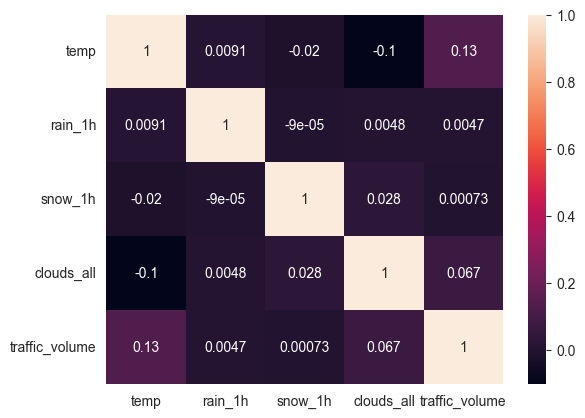

In [225]:
sns.heatmap(df_traffic_data[num_vars].corr(), annot=True)
plt.show()


In [118]:
df_traffic_temp = df_traffic_data.copy()

In [119]:
df_traffic_temp.describe()

,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,2016-01-05 10:46:16.773711616,3259.818355
min,0.000000,0.000000,0.000000,0.000000,2012-10-02 09:00:00,0.000000
25%,272.160000,0.000000,0.000000,1.000000,2014-02-06 11:45:00,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,2016-06-11 03:30:00,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,2017-08-11 06:00:00,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,2018-09-30 23:00:00,7280.000000
std,13.338232,44.789133,0.008168,39.015750,NaN,1986.860670


In [120]:
df_traffic_temp['weekday'] = df_traffic_temp.date_time.dt.weekday
df_traffic_temp['date'] = df_traffic_temp.date_time.dt.date
df_traffic_temp['hour'] = df_traffic_temp.date_time.dt.hour
df_traffic_temp['month'] = df_traffic_temp.date_time.dt.month
df_traffic_temp['year'] = df_traffic_temp.date_time.dt.year

In [121]:
df_traffic_temp.head(3)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,9,10,2012
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,10,10,2012
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,11,10,2012


In [122]:
boundaries = [0,4,8,12,16,20,24]
labels = ['Late_Night','Early_Morning','Morning','Afternoon', 'Evening', 'Night']
df_traffic_temp['hour_str'] = pd.cut(df_traffic_temp.hour, bins=boundaries ,labels=labels, right=False)
df_traffic_temp

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year,hour_str
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,9,10,2012,Morning
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,10,10,2012,Morning
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,11,10,2012,Morning
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,12,10,2012,Afternoon
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,13,10,2012,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,6,2018-09-30,19,9,2018,Evening
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,6,2018-09-30,20,9,2018,Night
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,6,2018-09-30,21,9,2018,Night
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,6,2018-09-30,22,9,2018,Night


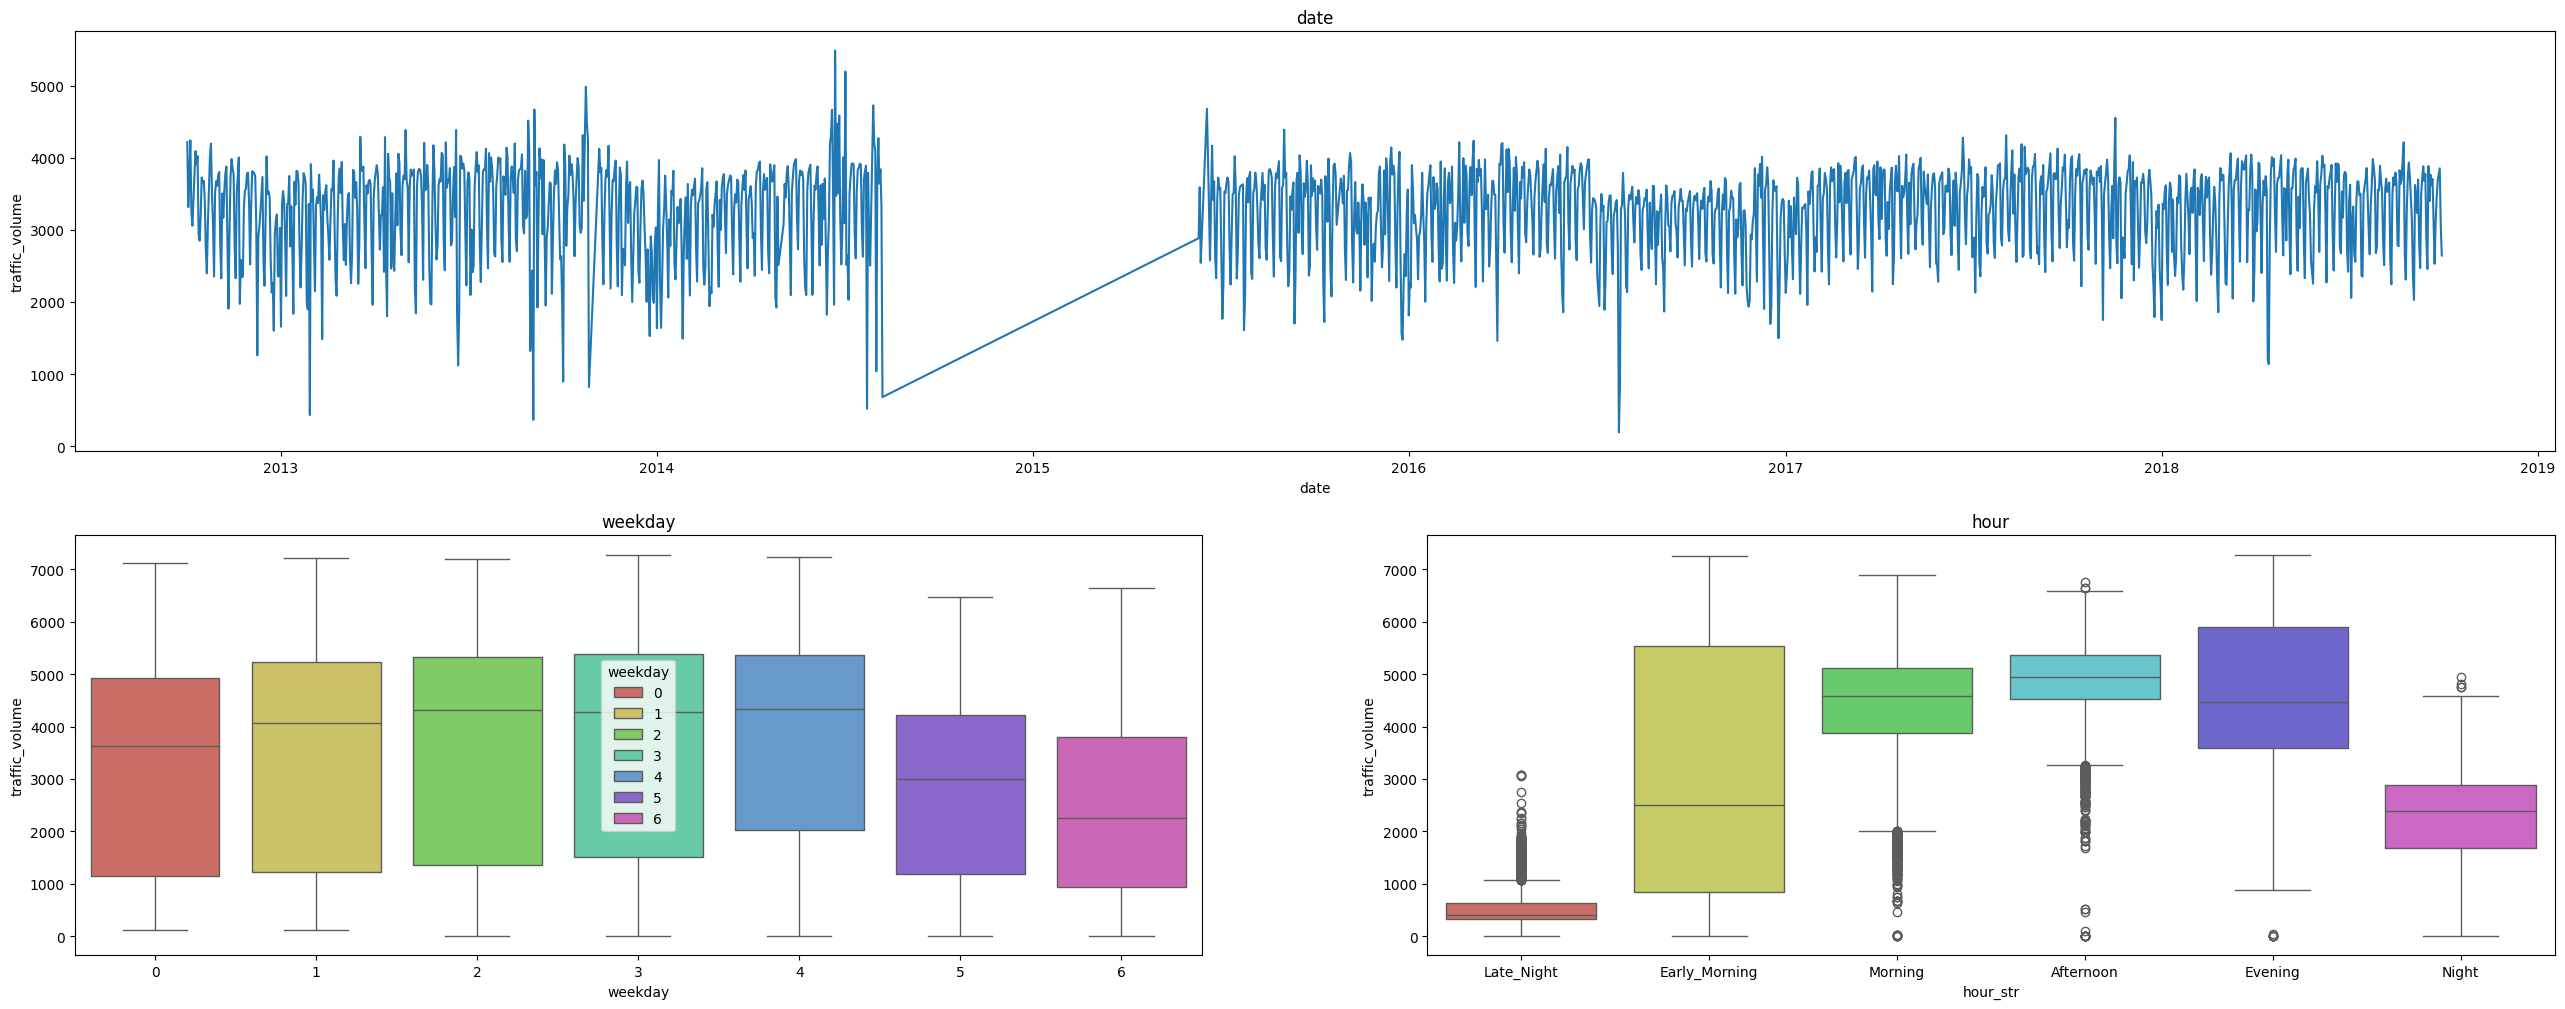

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_date_traffic = df_traffic_temp.groupby('date').aggregate({'traffic_volume':'mean'})

weekday_size = df_traffic_temp['weekday'].unique().size
hour_size = df_traffic_temp['hour_str'].unique().size

weekday_palette=sns.color_palette('hls', weekday_size)
hour_palette=sns.color_palette('hls', hour_size)

fig = plt.figure(figsize=(32,12))
axs = fig.subplot_mosaic([['date', 'date'],['weekday', 'hour']])


axs['date'].set_title('date')
axs['weekday'].set_title('weekday')
axs['hour'].set_title('hour')


sns.lineplot(x = df_date_traffic.index, y = df_date_traffic.traffic_volume, data = df_date_traffic)

sns.boxplot(x='weekday', y='traffic_volume', data = df_traffic_temp, hue='weekday', ax=axs['weekday'], palette=weekday_palette)
sns.boxplot(x='hour_str', y='traffic_volume', data = df_traffic_temp, hue='hour_str', ax=axs['hour'], palette=hour_palette)

plt.show()

In [124]:
print(f'all:{df_traffic_temp.holiday.size}, notNull:{df_traffic_temp.holiday.count()},  nan:{df_traffic_temp.holiday.size - df_traffic_temp.holiday.count()}')


df_traffic_temp.holiday = df_traffic_temp.holiday.replace(np.nan, 'None')
df_traffic_temp.holiday = df_traffic_temp.holiday.map(lambda x:  False if x == 'None' else True)

print(f'all:{df_traffic_temp.holiday.size}, notNull:{df_traffic_temp.holiday.count()},  nan:{df_traffic_temp.holiday.size - df_traffic_temp.holiday.count()}')



all:48204, notNull:61,  nan:48143
all:48204, notNull:48204,  nan:0


In [125]:
df_traffic_temp.holiday.unique()

array([False,  True])

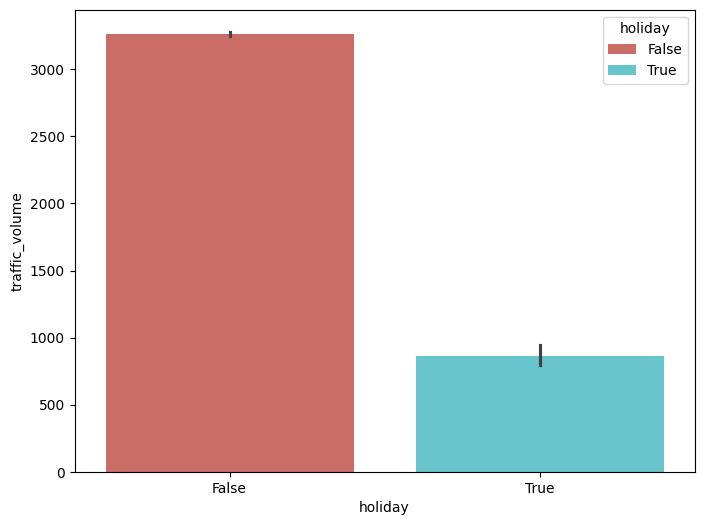

In [126]:
plt.figure(figsize=(8,6))
sns.barplot(x='holiday', y='traffic_volume', data = df_traffic_temp, hue= 'holiday', palette=sns.color_palette('hls', 2))
plt.show()

In [127]:
df_traffic_temp.weather_main.unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [128]:
df_traffic_temp.loc[df_traffic_temp.weather_main.str.contains('Thunderstorm'), 'weather_main'] = 'Rain'
df_traffic_temp.loc[df_traffic_temp.weather_main.str.contains('Squall'), 'weather_main'] = 'Rain'
df_traffic_temp.loc[df_traffic_temp.weather_main.str.contains('Drizzle'), 'weather_main'] = 'Rain'

df_traffic_temp.loc[df_traffic_temp.weather_main.str.contains('Mist'), 'weather_main'] = 'Fog'
df_traffic_temp.loc[df_traffic_temp.weather_main.str.contains('Haze'), 'weather_main'] = 'Fog'
df_traffic_temp.loc[df_traffic_temp.weather_main.str.contains('Smoke'), 'weather_main'] = 'Fog'

df_traffic_temp.loc[df_traffic_temp.weather_main.str.contains('Clouds'), 'weather_main'] = 'Clear'


df_traffic_temp.weather_main.unique()

array(['Clear', 'Rain', 'Fog', 'Snow'], dtype=object)

In [129]:
df_traffic_temp.weather_main.value_counts()

weather_main
Clear    28555
Rain      8531
Fog       8242
Snow      2876
Name: count, dtype: int64

In [130]:
df_traffic_temp.groupby('weather_main').aggregate( {'traffic_volume':['min', 'max','mean','count']})

traffic_volume                          
                        min   max         mean  count
weather_main                                         
Clear                     1  7280  3354.643565  28555
Fog                       0  7260  3002.244116   8242
Rain                      0  7260  3273.179815   8531
Snow                    113  7082  3016.844228   2876

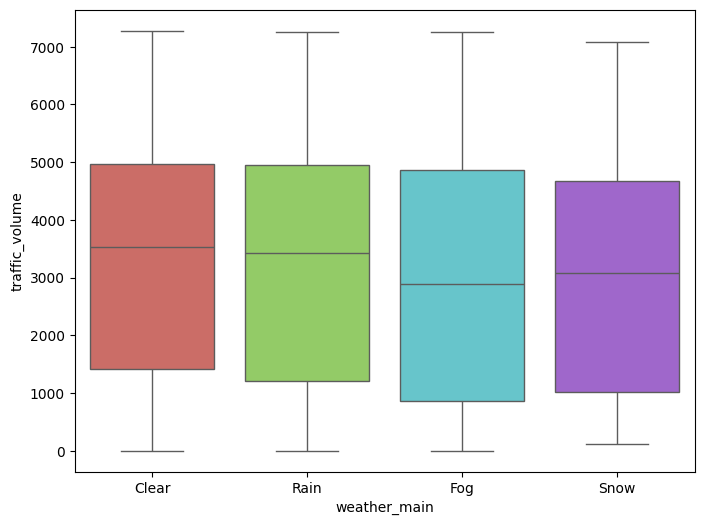

In [131]:
plt.figure(figsize=(8,6))
sns.boxplot(x='weather_main', y='traffic_volume', data = df_traffic_temp, hue='weather_main', palette=sns.color_palette('hls', 4))
plt.show()

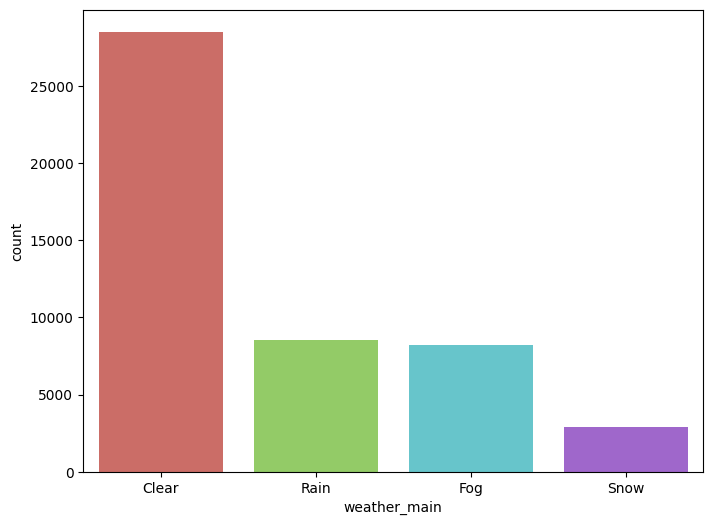

In [132]:
plt.figure(figsize=(8,6))
sns.countplot(x='weather_main', data=df_traffic_temp, hue='weather_main',  palette=sns.color_palette('hls', 4))
plt.show()

In [133]:
df_traffic_temp.rain_1h.describe()

count    48204.000000
mean         0.334264
std         44.789133
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       9831.300000
Name: rain_1h, dtype: float64

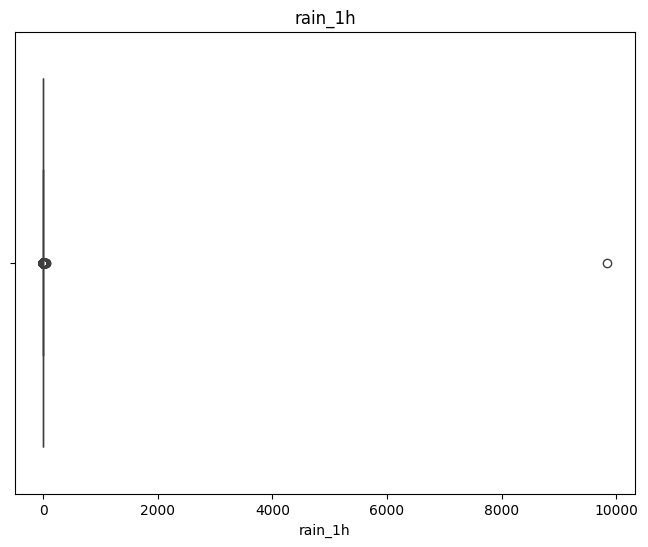

In [134]:
fig = plt.figure(figsize=(8,6))
axs = fig.subplot_mosaic([[ 'rain_1h']])

axs['rain_1h'].set_title('rain_1h')
sns.boxplot(x='rain_1h',  data =  df_traffic_temp , ax=axs['rain_1h'])

plt.show()

In [135]:
df_traffic_temp.rain_1h  = df_traffic_temp.rain_1h.replace( df_traffic_temp.rain_1h.max() , df_traffic_temp.rain_1h.median())

In [136]:
df_traffic_temp.rain_1h.describe()

count    48204.000000
mean         0.130312
std          1.003368
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         55.630000
Name: rain_1h, dtype: float64

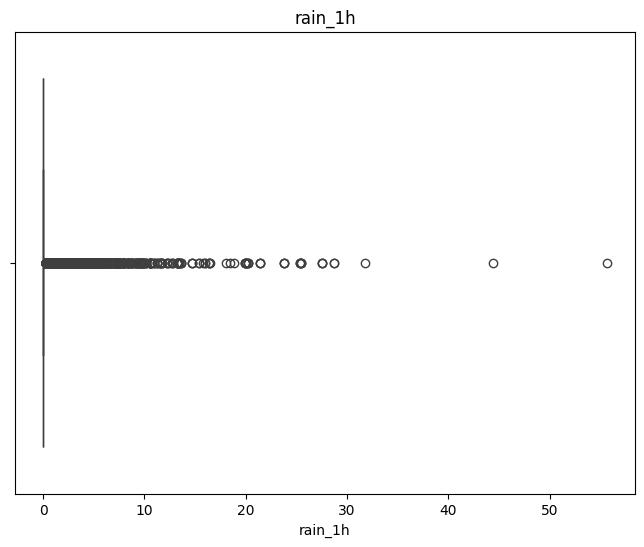

In [137]:
fig = plt.figure(figsize=(8,6))
axs = fig.subplot_mosaic([[ 'rain_1h']])

axs['rain_1h'].set_title('rain_1h')
sns.boxplot(x='rain_1h',  data =  df_traffic_temp , ax=axs['rain_1h'])

plt.show()

In [138]:
df_traffic_temp2 = df_traffic_temp.loc[df_traffic_temp.rain_1h>0]
df_traffic_temp2.describe()

,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume,weekday,hour,month,year
count,3466.000000,3466.000000,3466.000000,3466.000000,3466,3466.00000,3466.000000,3466.000000,3466.000000,3466.000000
mean,287.586979,1.812337,0.000589,69.481535,2015-09-17 05:26:55.118291968,3291.19850,2.823428,11.092037,7.046163,2015.164743
min,255.810000,0.250000,0.000000,0.000000,2013-06-05 10:00:00,2.00000,0.000000,0.000000,1.000000,2013.000000
25%,284.350000,0.250000,0.000000,64.000000,2014-04-04 16:15:00,1089.00000,1.000000,5.000000,5.000000,2014.000000
50%,290.080000,0.640000,0.000000,90.000000,2015-08-06 13:30:00,3518.50000,3.000000,11.000000,7.000000,2015.000000
75%,293.220000,1.780000,0.000000,90.000000,2016-08-23 22:00:00,5003.00000,4.000000,17.000000,9.000000,2016.000000
max,302.700000,55.630000,0.510000,100.000000,2018-09-30 18:00:00,6885.00000,6.000000,23.000000,12.000000,2018.000000
std,8.328482,3.309982,0.017318,30.905709,NaN,2008.12537,1.994939,6.729523,2.369029,1.730044


In [139]:
rain_q = pd.DataFrame(pd.qcut(df_traffic_temp2['rain_1h'] ,q=3, labels=['light','moderate','heavy']))

In [140]:
df_traffic_temp_cat = df_traffic_temp2.merge(rain_q, left_index=True, right_index=True, how='left')
df_traffic_temp_cat

,holiday,temp,rain_1h_x,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year,hour_str,rain_1h_y
6688,False,288.86,0.25,0.0,92,Rain,light rain,2013-06-05 10:00:00,4423,2,2013-06-05,10,6,2013,Morning,light
6689,False,289.11,0.25,0.0,92,Rain,moderate rain,2013-06-05 11:00:00,4756,2,2013-06-05,11,6,2013,Morning,light
6690,False,289.48,0.25,0.0,92,Rain,light rain,2013-06-05 12:00:00,4959,2,2013-06-05,12,6,2013,Afternoon,light
6691,False,289.54,0.25,0.0,92,Rain,light rain,2013-06-05 13:00:00,5093,2,2013-06-05,13,6,2013,Afternoon,light
6693,False,289.30,0.25,0.0,92,Rain,light rain,2013-06-05 15:00:00,6055,2,2013-06-05,15,6,2013,Afternoon,light
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48088,False,279.43,0.25,0.0,75,Rain,light rain,2018-09-26 08:00:00,6032,2,2018-09-26,8,9,2018,Morning,light
48109,False,286.49,0.25,0.0,75,Rain,light rain,2018-09-27 05:00:00,3002,3,2018-09-27,5,9,2018,Early_Morning,light
48116,False,286.88,0.25,0.0,90,Rain,light rain,2018-09-27 11:00:00,4670,3,2018-09-27,11,9,2018,Morning,light
48153,False,276.18,0.25,0.0,1,Rain,light rain,2018-09-29 00:00:00,1733,5,2018-09-29,0,9,2018,Late_Night,light


In [141]:
df_traffic_temp_cat.rain_1h_y.describe()

count         3466
unique           3
top       moderate
freq          1179
Name: rain_1h_y, dtype: object

In [142]:
# df_traffic_cat['rain_1h_y'] = df_traffic_cat.rain_1h_y.cat.add_categories('no_rain')


df_traffic_temp_cat.drop(columns=['rain_1h_x'], inplace = True)
df_traffic_temp_cat.rename(columns={'rain_1h_y':'rain_1h'}, inplace = True)
df_traffic_temp_cat.head()

,holiday,temp,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year,hour_str,rain_1h
6688,False,288.86,0.0,92,Rain,light rain,2013-06-05 10:00:00,4423,2,2013-06-05,10,6,2013,Morning,light
6689,False,289.11,0.0,92,Rain,moderate rain,2013-06-05 11:00:00,4756,2,2013-06-05,11,6,2013,Morning,light
6690,False,289.48,0.0,92,Rain,light rain,2013-06-05 12:00:00,4959,2,2013-06-05,12,6,2013,Afternoon,light
6691,False,289.54,0.0,92,Rain,light rain,2013-06-05 13:00:00,5093,2,2013-06-05,13,6,2013,Afternoon,light
6693,False,289.30,0.0,92,Rain,light rain,2013-06-05 15:00:00,6055,2,2013-06-05,15,6,2013,Afternoon,light


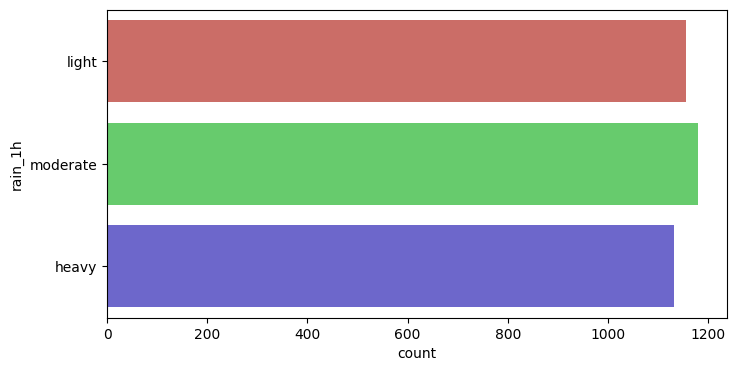

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.figure(figsize=(8,4))
sns.countplot(y='rain_1h', data=df_traffic_temp_cat, hue='rain_1h',  palette=sns.color_palette('hls', 3))
plt.show()

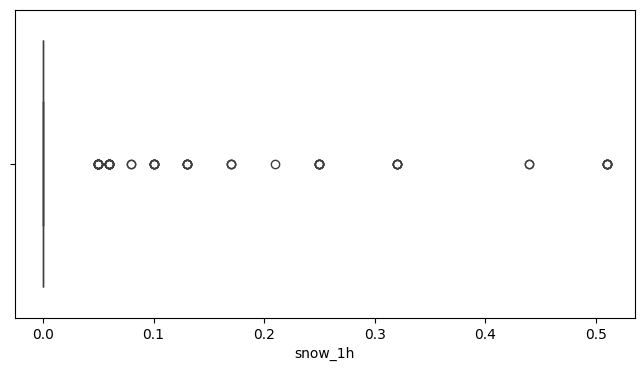

In [147]:
plt.figure(figsize=(8,4))
sns.boxplot(x='snow_1h', data = df_traffic_temp)
plt.show()

In [149]:
df_traffic_temp.snow_1h[df_traffic_temp.snow_1h>0].count()

63

In [150]:
df_traffic_temp.snow_1h = df_traffic_temp.snow_1h.map(lambda x: 'no_snow' if x==0 else 'snow')
df_traffic_temp.snow_1h.describe()

count       48204
unique          2
top       no_snow
freq        48141
Name: snow_1h, dtype: object

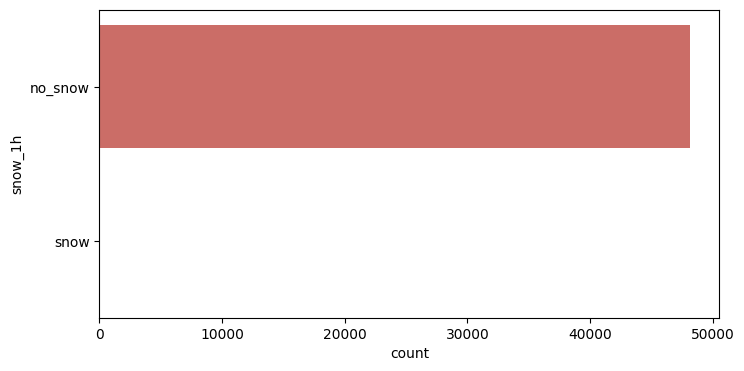

In [151]:
plt.figure(figsize=(8,4))
sns.countplot(y='snow_1h', data=df_traffic_temp, hue='snow_1h',  palette=sns.color_palette('hls', 2))
plt.show()

In [152]:
df_traffic_temp.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year,hour_str
0,False,288.28,0.0,no_snow,40,Clear,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,9,10,2012,Morning
1,False,289.36,0.0,no_snow,75,Clear,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,10,10,2012,Morning
2,False,289.58,0.0,no_snow,90,Clear,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,11,10,2012,Morning
3,False,290.13,0.0,no_snow,90,Clear,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,12,10,2012,Afternoon
4,False,291.14,0.0,no_snow,75,Clear,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,13,10,2012,Afternoon


In [153]:


df_traffic_temp.groupby('hour').aggregate( {'traffic_volume':['min', 'max','mean','count']})



traffic_volume                         
                min   max         mean count
hour                                        
0                 6  3075   834.781051  2037
1                 2  1806   516.449000  2049
2                 3  1432   388.353640  2019
3                 1   930   371.090864  2025
4                 7  1334   702.551889  2091
5               208  3481  2094.573437  2063
6               241  6386  4140.503594  2087
7               190  7260  4740.181337  2079
8                 1  6888  4587.497115  2080
9                 1  6063  4385.277502  2018
10                3  5422  4184.665544  2078
11               24  6012  4465.877561  1952
12                2  6470  4718.293095  1955
13               10  6645  4714.940682  1905
14                2  6589  4931.888776  1969
15                3  6750  5240.524302  1934
16                7  7280  5663.756539  1988
17                5  6968  5310.076048  1933
18                0  5773  4263.718530  1986
19                1  4550  3276.394187  1961
20                5  4490  2834.667509  1979
21                2  4939  2668.940464  1982
22                1  4816  2199.405717  1994
23                0  4072  1469.135294  2040

In [177]:
def hour_modify(x):
    middle_volume = [5,19, 20, 21, 22]
    small_volume = [23,0,1,2,3,4]
    if x in small_volume:
        return 'SmallVolume'
    elif x in middle_volume:
        return 'MiddleVolume'
    else:
        return 'BigVolume'

In [178]:
df_traffic_temp['hour_str2'] = df_traffic_temp.hour.map(hour_modify)
df_traffic_temp

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year,hour_str,hour_str2
0,False,288.28,0.0,no_snow,40,Clear,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,9,10,2012,Morning,BigVolume
1,False,289.36,0.0,no_snow,75,Clear,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,10,10,2012,Morning,BigVolume
2,False,289.58,0.0,no_snow,90,Clear,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,11,10,2012,Morning,BigVolume
3,False,290.13,0.0,no_snow,90,Clear,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,12,10,2012,Afternoon,BigVolume
4,False,291.14,0.0,no_snow,75,Clear,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,13,10,2012,Afternoon,BigVolume
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,False,283.45,0.0,no_snow,75,Clear,broken clouds,2018-09-30 19:00:00,3543,6,2018-09-30,19,9,2018,Evening,MiddleVolume
48200,False,282.76,0.0,no_snow,90,Clear,overcast clouds,2018-09-30 20:00:00,2781,6,2018-09-30,20,9,2018,Night,MiddleVolume
48201,False,282.73,0.0,no_snow,90,Rain,proximity thunderstorm,2018-09-30 21:00:00,2159,6,2018-09-30,21,9,2018,Night,MiddleVolume
48202,False,282.09,0.0,no_snow,90,Clear,overcast clouds,2018-09-30 22:00:00,1450,6,2018-09-30,22,9,2018,Night,MiddleVolume


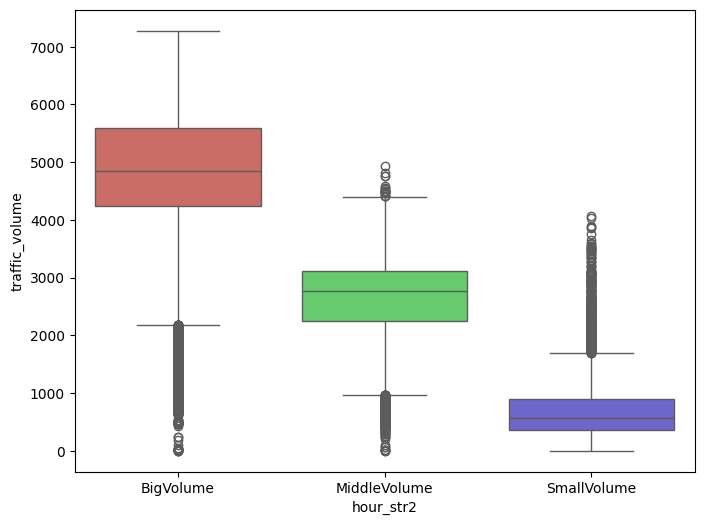

In [182]:
plt.figure(figsize=(8,6))
sns.boxplot(x='hour_str2', y='traffic_volume', data = df_traffic_temp, hue='hour_str2', palette=sns.color_palette('hls', 3))
plt.show()

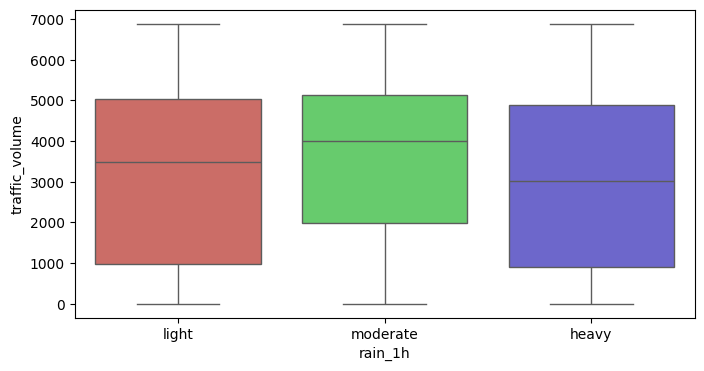

In [183]:

plt.figure(figsize=(8,4))
sns.boxplot(x='rain_1h', y='traffic_volume', data = df_traffic_temp_cat, hue='rain_1h', palette=sns.color_palette('hls', 3))
plt.show()

In [187]:
df_traffic_data[df_traffic_data.date_time == '2016-01-01 00:00:00']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
20344,New Years Day,265.94,0.0,0.0,90,Haze,haze,2016-01-01,1513
20345,New Years Day,265.94,0.0,0.0,90,Snow,light snow,2016-01-01,1513


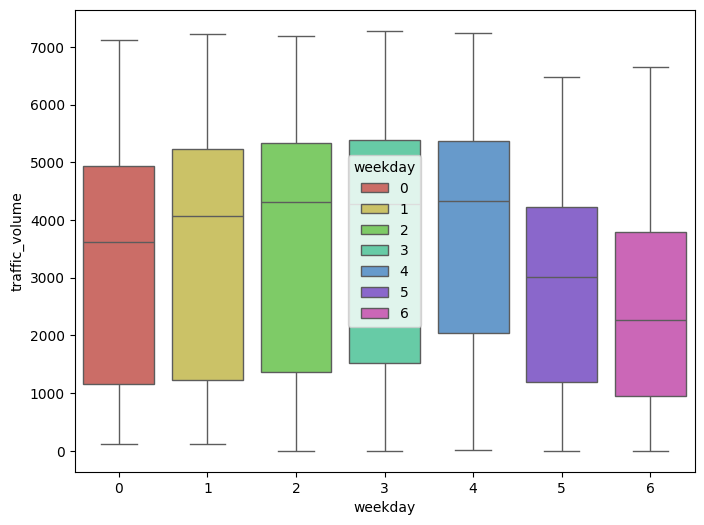

In [189]:
plt.figure(figsize=(8,6))
sns.boxplot(x='weekday', y='traffic_volume', data = df_traffic_temp, hue='weekday', palette=sns.color_palette('hls', 7))
plt.show()